<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Kernels-and-Feature-maps:-Theory-and-intuition" data-toc-modified-id="Kernels-and-Feature-maps:-Theory-and-intuition-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Kernels and Feature maps: Theory and intuition</a></span></li><li><span><a href="#Theory-and-derivations" data-toc-modified-id="Theory-and-derivations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Theory and derivations</a></span></li><li><span><a href="#A-visual-example-to-help-intuition" data-toc-modified-id="A-visual-example-to-help-intuition-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>A visual example to help intuition</a></span></li><li><span><a href="#Python-implementation-of-various-feature-maps-and-kernels" data-toc-modified-id="Python-implementation-of-various-feature-maps-and-kernels-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Python implementation of various feature maps and kernels</a></span></li><li><span><a href="#From-Feature-Maps-to-Kernels" data-toc-modified-id="From-Feature-Maps-to-Kernels-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>From Feature Maps to Kernels</a></span><ul class="toc-item"><li><span><a href="#Sklearn-implementation-of-SVC-with-Gram-matrix" data-toc-modified-id="Sklearn-implementation-of-SVC-with-Gram-matrix-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Sklearn implementation of SVC with Gram matrix</a></span></li><li><span><a href="#Sklearn-implementation-using-custom-Kernel" data-toc-modified-id="Sklearn-implementation-using-custom-Kernel-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Sklearn implementation using custom Kernel</a></span></li><li><span><a href="#Plot-decision-boundary" data-toc-modified-id="Plot-decision-boundary-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Plot decision boundary</a></span></li></ul></li></ul></div>

# Kernels and Feature maps: Theory and intuition
Following the series on SVM, we will now explore the theory and intuition behind Kernels and Feature maps, showing the link between the two as well as advantages and disadvantages. 

The notebook is divided into two main sections: 
1. Theory, derivations and pros and cons of the two concepts
2. An intuitive and visual interpretation in 3 dimensions

The section part of this notebook seved as a basis for the following answer on stats.stackexchange: 
- https://stats.stackexchange.com/questions/152897/how-to-intuitively-explain-what-a-kernel-is/355046#355046



# Theory and derivations
### Notation and terminology

- **Attributes** of a problem are the original inputs: $x_1, x_2,...x_n$
- **Feature mapping** is a function of the input attributes $\phi(x)$
- **Features** are the new set of quantities that result from applying the mapping

For example we could have

$$ \phi(x) = \begin{bmatrix} x \\ x^2 \\ x^3 \end{bmatrix}$$

To obtain more complex, non linear, decision boundaries, we may want to apply the SVM algorithm to learn some features $\phi(x)$ rather than the input attributes $x$ only. To do so we replace $x$ everywhere in the previous formuals with $\phi(x)$ and repeat the optimization procedure. 

The problem is that the features may live in very *high dimensional space*, possibly infinite, which makes the computation of the dot product $<\phi(x^{(i)},\phi(x^{(j)})>$ very difficult. This is where we introduce the notion of a **Kernel** which will greatly help us perform these computations. 

### Kernels: definition and example

Given a feature mapping $\phi$ we define the corresponding Kernel as

$$ K(x,z) = \phi(x)^T\phi(z)$$

Hence we can replace the inner product $<\phi(x),\phi(z)>$ with $K(x,z)$ in the SVM algorithm. What is interesting is that the kernel may be very inexpensive to calculate, and may correspond to a mapping in very high dimensional space. So we can train an SVM in such space without having to explicitly calculate the inner product. 

Consider the example where $x,z \in \mathbb{R}^n$ and $K(x,z) = (x^Tz)^2$. We can also write this as


\begin{aligned}
	K(x,z) & = \left( \sum_i^n x_i z_i\right)  \left( \sum_j^n x_j z_j\right)
	\\
	& = \sum_i^n  \sum_j^n x_i x_j z_i z_j 
	\\
	& = \sum_{i,j}^n (x_i x_j )(z_i z_j)
	\\
	& = \phi(x)^T \phi(z)
\end{aligned}

Where the feature mapping $\phi$ is given by (in this case $n = 2$) 

$$ \phi(x) = \begin{bmatrix} x_1 x_1 \\ x_1 x_2 \\ x_2x_1 \\ x_2 x_2 \end{bmatrix}$$





Calculating the feature mapping is of complexity $O(n^2)$ due to the number of features, whereas calculating $K(x,z)$ is of complexity $O(n)$ as it is a simple inner product $x^Tz$ which is then squared $K(x,z) = (x^Tz)^2$. 


Another example of Kernel is 


\begin{aligned}
	K(x,z) & = (x^Tz + c )^2
	\\
	& =  \sum_{i,j}^n (x_i x_j )(z_i z_j) + \sum_i^n (\sqrt{2c} x_i) (\sqrt{2c} x_i) + c^2
\end{aligned}


which corresponds to the features mapping 

$$ \phi(x) = \begin{bmatrix} x_1 x_1 \\ x_1 x_2 \\ x_2x_1 \\ x_2 x_2 \\  \sqrt{2c} x_1 \\ \sqrt{2c} x_2\end{bmatrix}$$

so the parameter $c$ controls the relative weighting of the first and second order polynomials. More generally the kernel $K(x,z) = (x^Tz + c)^d$ corresponds to a feature mapping to an $\binom{n + d}{d}$ feature space, corresponding to all monomials that are up to order $d$. Despite working in this $O(n^d)$ dimensional space, computing $K(x,z)$ is of order $O(n)$. 



**An intuitive view** of Kernels would be that they correspond to functions that measure how closely related vectors $x$ and $z$ are. So when $x$ and $z$ are similar the Kernel will output a large value, and when they are dissimilar K will be small. Knowing this justifies the use of the Gaussian Kernel as a measure of similarity

$$ K(x,z) = \exp[ \left( - \frac{||x-z||^2}{2 \sigma^2}\right)$$

because the value is close to 1 when they are similar and close to 0 when they are not. 

### Necessary and sufficient conditions

The following are necessary and sufficient conditions for a function to be a valid kernel. Let $G$ be the **Kernel matrix** or **Gram matrix** which is square of size $m \times m$ and where each $i,j$ entry corresponds to $G_{i,j} = K(x^{(i)}, x^{(j)})$ of the data set $X = \{x^{(1)}, ... , x^{(m)} \}$

- The function $K : \mathbb{R}^n \times \mathbb{R}^n \rightarrow \mathbb{R}$ is a valid kernel if and only if
- the kernel matrix $G$ is symmetric, positive semi-definite


This is both a *necessary* and *sufficient* condition (i.e. goes both ways) and is called Mercer's theorem. 


### Properties

- Kernels are \textbf{symmetric}: $K(x,y) = K(y,x)$
- Kernels are \textbf{positive, semi-definite}: $\sum_{i=1}^m\sum_{j=1}^m c_i c_jK(x^{(i)},x^{(j)}) \geq 0$
- Sum of two kernels is a kernel: $K(x,y) = K_1(x,y) + K_2(x,y) $
- Product of two kernels is a kernel:  $K(x,y) = K_1(x,y) K_2(x,y) $
- Scaling by any function on both sides is a kernel: $K(x,y) = f(x) K_1(x,y) f(y)$
- Kernels are often scaled such that $K(x,y) \leq 1$ and $K(x,x) = 1$


### Common Kernels

- Linear: is the inner product: $K(x,y) = x^T y$
- Gaussian / RBF / Radial : $K(x,y) = \exp ( - \gamma (x - y)^2)$
- Polynomial: is the inner product: $K(x,y) = (1 + x^T y)^p$
- Laplace: is the inner product: $K(x,y) = \exp ( - \beta |x - y|)$
- Cosine: is the inner product: $K(x,y) = \exp ( - \beta |x - y|)$

### Gaussian kernels

In general the Squared Exponential Kernel, or Gaussian kernel is defined as

$$ K(\mathbf{x,x'}) = \exp \left( - \frac{1}{2} (\mathbf{x - x'})^T \Sigma (\mathbf{x - x'}) \right)$$

If $\Sigma$ is diagnonal then this can be written as 

$$ K(\mathbf{x,x'}) = \exp \left( - \frac{1}{2} \sum_{j = 1}^n \frac{1}{\sigma^2_j} (x_j - x'_j)^2 \right)$$

Where the parameter $\sigma^2_j$  is the characteristic length scale of dimension $j$. if $\sigma^2_j = \infty$ the dimension is ignored, hence this is known as the **ARD** kernel. 


Finally if  $\Sigma$  is sperical, we get the isotropic kernel

$$ K(\mathbf{x,x'}) = \exp \left( - \frac{ || \mathbf{x - x'} ||^2}{2\sigma^2} \right)$$

Which is a **radial basis function** or RBF kernel as it is only a function of $|| \mathbf{x - x'} ||^2$. $\sigma^2$ is known as the bandwidth parameter. 



### Gram Matrix vs Feature Map

Consider a dataset of $m$ data points which are $n$ dimensional vectors $\in \mathbb{R}^n$, the **gram matrix** is the $m \times m$ matrix for which each entry is the kernel between the corresponding data points. 

$$ G_{i,j} = K(x^{(i)}, x^{(j)})$$



Since a Kernel function corresponds to an inner product in some (possibly infinite dimensional) feature space, we can also write the kernel as a **feature mapping**

$$ K(x^{(i)}, x^{(j)}) = \phi(x^{(i)})^T \phi(x^{(j)})$$

When using a Kernel in a linear model, it is just like transforming the input data, then running the model in the transformed space. 


For the linear kernel, the Gram matrix is simply the inner product $ G_{i,j} = x^{(i) \ T} x^{(j)}$. For other kernels, it is the inner product in a feature space with feature map $\phi$: i.e. $ G_{i,j} = \phi(x^{(i)})^T \ \phi(x^{(j)})$


### Advantages and disadvantages of Gram matrix and Feature mapping



**Grams matrix**: reduces computations by pre-computing the kernel for all pairs of training examples

- On the other hand, the Gram matrix may be impossible to hold in memory for large $m$
- The cost of taking the product of the Gram matrix with weight vector may be large

**Feature maps**: are computationally very efficient

- As long as we can transform and store the input data efficiently
- The drawback is that the dimension of transformed data may be much larger than the original data
- memory required to store the features and cost of taking the product to compute the gradient. 
- finally, feature maps may require infinite dimensional space (e.g. Gaussian Kernel) which requires approximation

As a result there exists systems trade offs and rules of thumb

- When the number of examples is very large, \textbf{feature maps are better}
- When transformed features have high dimensionality, \textbf{Grams matrices} are better 

--------------


### Sources and further reading
- http://www.cs.cornell.edu/courses/cs6787/2017fa/Lecture4.pdf
- https://disi.unitn.it/~passerini/teaching/2014-2015/MachineLearning/slides/17_kernel_machines/handouts.pdf
- Stanford CS229 - Lecture notes
- Introduction to Statistical Learning
- Elements of Statistical Learning

# A visual example to help intuition

*From the following stats.stackexchange post:*
- https://stats.stackexchange.com/questions/152897/how-to-intuitively-explain-what-a-kernel-is/355046#355046

--------------

Consider the following dataset where the yellow and blue points are clearly not linearly separable in two dimensions.

[![enter image description here][1]][1]

If we could find a higher dimensional space in which these points were **linearly separable**, then we could do the following:

- Map the original features to the higher, transformer space (feature mapping)
- Perform linear SVM in this higher space
- Obtain a set of weights corresponding to the decision boundary hyperplane
- Map this hyperplane back into the original 2D space to obtain a non linear decision boundary

There are many higher dimensional spaces in which these points are linearly separable. Here is one example

$$ x_1, x_2 : \rightarrow z_1, z_2, z_3$$
$$ z_1 = \sqrt{2}x_1x_2 \ \   z_2 = x_1^2 \ \  z_3 = x_2^2$$

This is where the Kernel trick comes into play. Quoting the above great answers

> Suppose we have a mapping $\varphi \, : \, \mathbb R^n \to \mathbb
> R^m$ that brings our vectors in $\mathbb R^n$ to some feature space
> $\mathbb R^m$. Then the dot product of $\mathbf x$ and $\mathbf y$ in
> this space is $\varphi(\mathbf x)^T \varphi(\mathbf y)$. A kernel is a
> function $k$ that corresponds to this dot product, i.e. $k(\mathbf x,
> \mathbf y) = \varphi(\mathbf x)^T \varphi(\mathbf y)$

If we could find a kernel function that was equivalent to the above feature map, then we could plug the kernel function in the linear SVM and perform the calculations very efficiently. 

### Polynomial kernel

It turns out that the above feature map corresponds to the well known **polynomial kernel** : $K(\mathbf{x},\mathbf{x'}) = (\mathbf{x}^T\mathbf{x'})^d$. Let $d = 2$ and $\mathbf{x} = (x_1, x_2)^T$ we get

\begin{aligned}
    k(\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}, \begin{pmatrix} x_1' \\ x_2' \end{pmatrix} ) & = (x_1x_2' + x_2x_2')^2
    \\
    & = 2x_1x_1'x_2x_2' + (x_1x_1')^2 + (x_2x_2')^2
    \\
    & = (\sqrt{2}x_1x_2  \ x_1^2 \ x_2^2) \ \begin{pmatrix} \sqrt{2}x_1'x_2' \\ x_1'^2  \\ x_2'^2 \end{pmatrix}
    \end{aligned}

$$ k(\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}, \begin{pmatrix} x_1' \\ x_2' \end{pmatrix} ) = \phi(\mathbf{x})^T \phi(\mathbf{x'})$$

$$ \phi(\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}) =\begin{pmatrix}  \sqrt{2}x_1x_2 \\ x_1^2 \\ x_2^2 \end{pmatrix}$$

### Visualizing the feature map and the resulting boundary line

- Left hand side plot shows the points plotted in the transformed space together with the SVM linear boundary hyper plane
- Right hand side plot shows the result in the original 2-D space

[![enter image description here][2]][2]


  [1]: https://i.stack.imgur.com/3jSKW.png
  [2]: https://i.stack.imgur.com/Xmjv5.png

# Python implementation of various feature maps and kernels 

### Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from IPython.display import HTML, Image

%matplotlib inline
sns.set()

from sklearn.datasets.samples_generator import make_circles

### Feature map n. 1) 
### Sum of polynomials 
$$ \phi(x_1, x_2) = (z_1,z_2,z_3) = (x_1,x_2, x_1^2 + x_2^2)$$

In [3]:
def feature_map_1(X):
    return np.asarray((X[:,0], X[:,1], X[:,0]**2 + X[:,1]**2)).T

Text(0.5,0.92,'Transformed dataset')

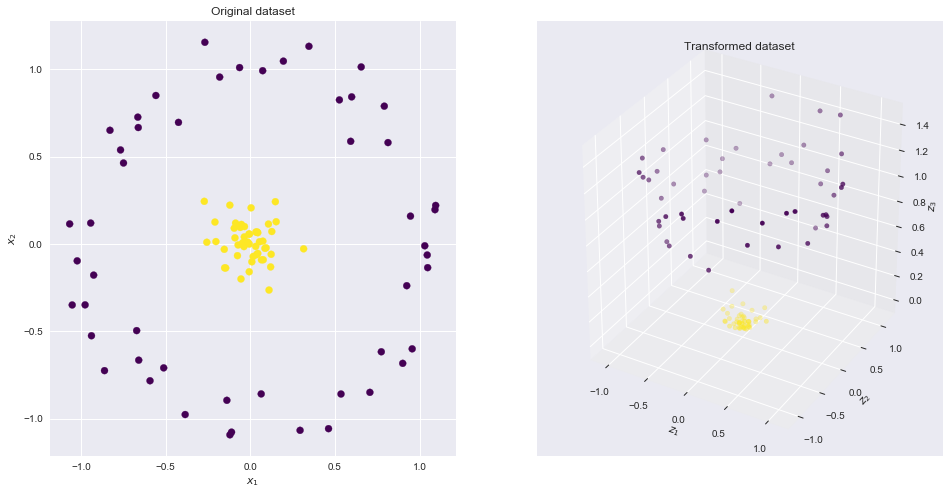

In [4]:
#Generate dataset and feature-map
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
Z = feature_map_1(X)

#2D scatter plot
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], c = y, cmap = 'viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Original dataset')

#3D scatter plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Z[:,0],Z[:,1], Z[:,2],c = y, cmap = 'viridis' ) #,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed dataset')

### Feature map n. 2) 
### Gaussian Radial Basis Function (RBF) centered at $0,0$
$$ \phi(x_1, x_2) = (z_1,z_2,z_3) = (x_1,x_2, e^{- [x_1^2 + x_2^2]  })$$

In [5]:
def feature_map_2(X):  
    return np.asarray((X[:,0], X[:,1], np.exp( -( X[:,0]**2 + X[:,1]**2)))).T

Text(0.5,0.92,'Transformed dataset')

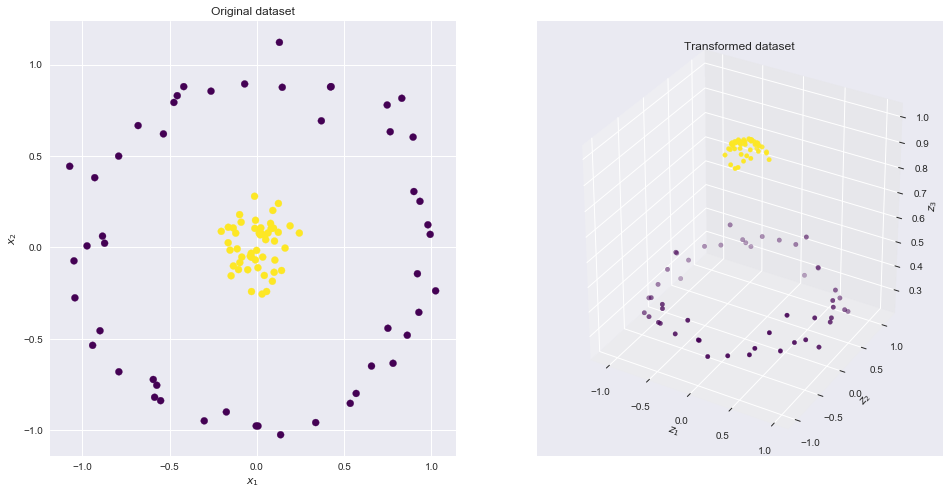

In [6]:
#Generate dataset and feature-map
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
Z = feature_map_2(X)

#2D scatter plot
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], c = y, cmap = 'viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Original dataset')

#3D scatter plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Z[:,0],Z[:,1], Z[:,2],c = y, cmap = 'viridis' ) #,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed dataset')

### Feature map n. 3) - also a polynomial kernel
$K(\mathbf{x},\mathbf{x'}) = (\mathbf{x}^T\mathbf{x'})^d$

Let $d = 2$ and $\mathbf{x} = (x_1, x_2)^T$ we get

\begin{aligned}
    k(\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}, \begin{pmatrix} x_1' \\ x_2' \end{pmatrix} ) & = (x_1x_2' + x_2x_2')^2
    \\
    & = 2x_1x_1'x_2x_2' + (x_1x_1')^2 + (x_2x_2')^2
    \\
    & = (\sqrt{2}x_1x_2  \ x_1^2 \ x_2^2) \ \begin{pmatrix} \sqrt{2}x_1'x_2' \\ x_1'^2  \\ x_2'^2 \end{pmatrix}
    \end{aligned}

$$ k(\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}, \begin{pmatrix} x_1' \\ x_2' \end{pmatrix} ) = \phi(\mathbf{x})^T \phi(\mathbf{x'})$$

Where 

$$ \phi(\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}) =\begin{pmatrix}  \sqrt{2}x_1x_2 \\ x_1^2 \\ x_2^2 \end{pmatrix}$$

In the plot of the transformed data we map 
$$ x_1, x_2 : \rightarrow z_1, z_2, z_3$$
$$ z_1 = \sqrt{2}x_1x_2 \ \   z_2 = x_1^2 \ \  z_3 = x_2^2$$


In [7]:
def feature_map_3(X):  
    return np.asarray(( np.sqrt(2) *X[:,0] * X[:,1], X[:,0]**2, X[:,1]**2)).T

w= [-0.05481854 -2.53191791 -2.52028513] b= [1.14976292]


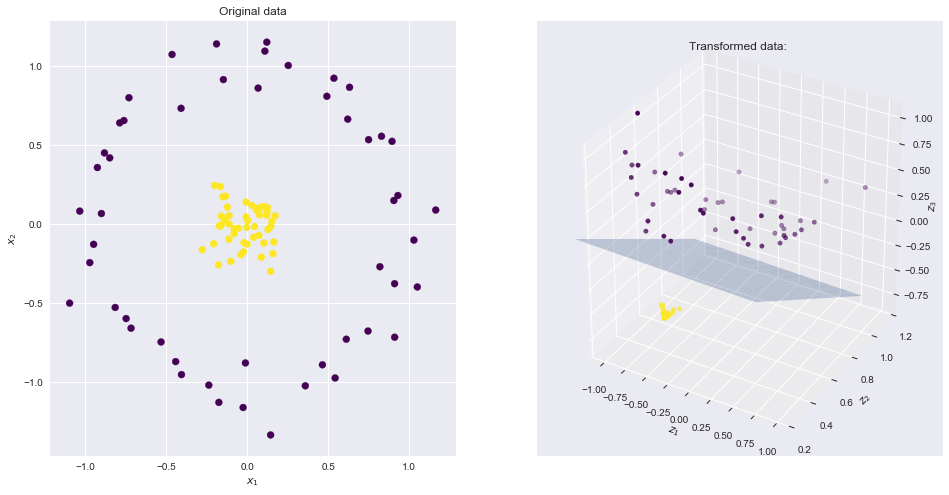

In [20]:
#Generate dataset and feature-map
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1, random_state = 0)
Z = feature_map_3(X)

#2D scatter plot
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], c = y, cmap = 'viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Original data')

#3D scatter plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Z[:,0],Z[:,1], Z[:,2],c = y, cmap = 'viridis' ) #,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed data: ')

#SVM using kernel 3 - feature map 3
clf = svm.SVC(C = 1, kernel = 'linear')
clf.fit(Z, y) 

w = clf.coef_.flatten()
b = clf.intercept_.flatten()
print('w=',w,'b=',b)

# create x,y
xx, yy = np.meshgrid(np.linspace(-1,1), np.linspace(0,1))

# calculate corresponding z
boundary = (-w[0] * xx - w[1] * yy - b) * 1. /w[2]


# plot the surface

ax.plot_surface(xx, yy, boundary, alpha = .3)
ax.set_ylim(.2,1.2)
ax.set_zlim(-.9,1.1)
#ax.view_init(0, 260)

plt.show()


# From Feature Maps to Kernels 
### Kernel as the inner product in the transformed space

$$ K(\mathbf{x^{(i)}, x^{(j)}}) = \phi(\mathbf{x}^{(i)})^T \phi(\mathbf{x}^{(j)}) $$

### Grams matrix as an outer product in the transformed space

$$G_{i,j} = K(\mathbf{x^{(i)}, x^{(j)}}) $$

$$ G = \tilde X \tilde X^T$$


## Sklearn implementation of SVC with Gram matrix

In [14]:
from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC(kernel='precomputed')
# kernel computation
gram = np.dot(feature_map_2(X), feature_map_2(X).T)
clf.fit(gram, y) 

# prediction errors on training examples
np.sum(y - clf.predict(gram))


0

## Sklearn implementation using custom Kernel 

In [15]:
def my_kernel_1(X,Y):
    return np.dot(feature_map_1(X),feature_map_1(Y).T )

def my_kernel_2(X,Y):
    return np.dot(feature_map_2(X),feature_map_2(Y).T )

def my_kernel_3(X,Y):
    return np.dot(feature_map_3(X),feature_map_3(Y).T )

In [16]:
#SVM using kernel 1 - feature map 1
clf = svm.SVC(kernel=my_kernel_1)
clf.fit(X, y) 

# predict on training examples - print accuracy score
print('Accuracy score using feature map n1',accuracy_score(y, clf.predict(X)))

#SVM using kernel 2 - feature map 2
clf = svm.SVC(kernel=my_kernel_2)
clf.fit(X, y) 

# predict on training examples - print accuracy score
print('Accuracy score using feature map n2',accuracy_score(y, clf.predict(X)))

#SVM using kernel 3 - feature map 3
clf = svm.SVC(kernel=my_kernel_3)
clf.fit(X, y) 

# predict on training examples - print accuracy score
print('Accuracy score using feature map n3',accuracy_score(y, clf.predict(X)))

Accuracy score using feature map n1 1.0
Accuracy score using feature map n2 1.0
Accuracy score using feature map n3 1.0


## Plot decision boundary 

Text(0,0.5,'$x_2$')

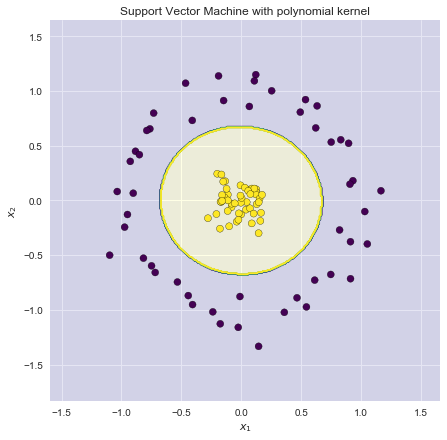

In [19]:
clf = svm.SVC(kernel=my_kernel_3, C = 1)
# kernel computation
clf.fit(X, y) 

#Initialize data
h = .01 #Stepsize in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Predict on meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize = (7,7))
plt.contourf(xx, yy, Z,1, colors = ['darkblue','yellow'], alpha = .1)
plt.contour(xx, yy, Z, cmap = 'viridis')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors = 'k')
plt.title('Support Vector Machine with polynomial'
          ' kernel')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')